In [20]:
import psycopg2
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

**IMPORTAR DATOS**

In [21]:
host = os.environ.get("POSTGRES_HOST")
port = int(os.environ.get("POSTGRES_PORT"))
database = os.environ.get("POSTGRES_DB")
user = os.environ.get("POSTGRES_USER")
password = os.environ.get("POSTGRES_PASSWORD")

In [22]:
# Configuración de la conexión
conn = psycopg2.connect(
    host=host,
    database=database,
    user=user,
    password=password
)

# Crear un cursor
cur = conn.cursor()

In [28]:
# Ejecutar consulta para obtener datos de la vista
conn.rollback()  # Esto limpia el estado de transacción fallida. Sino una vez falle una consulta se va a quedar pegado.

cur.execute('SELECT "pkAgente", "Actividad", "Estado", "Date", datetime, hora, demanda_real FROM tablasxm_dev.demanda_real_pereira;')

datos_demanda = cur.fetchall()

column_names = [desc[0] for desc in cur.description]
df_demanda = pd.DataFrame(datos_demanda, columns=column_names)
df_demanda = df_demanda.sort_values('datetime')

df_demanda.head()

,pkAgente,Actividad,Estado,Date,datetime,hora,demanda_real
7217,EEPC,COMERCIALIZACIÓN,OPERACION,2024-06-06,2024-06-06 00:00:00,1,78079.22
7947,EEPC,COMERCIALIZACIÓN,OPERACION,2024-06-06,2024-06-06 01:00:00,2,74109.54
8584,EEPC,COMERCIALIZACIÓN,OPERACION,2024-06-06,2024-06-06 02:00:00,3,72325.59
8746,EEPC,COMERCIALIZACIÓN,OPERACION,2024-06-06,2024-06-06 03:00:00,4,71807.68
8812,EEPC,COMERCIALIZACIÓN,OPERACION,2024-06-06,2024-06-06 04:00:00,5,74368.11


In [33]:
# Ejecutar consulta para obtener datos de la vista
cur.execute('SELECT "pkAgente", "pkRecurso", "NombreRecurso", "Tipo_Recurso", "Actividad", "Estado", "Date", hora, temperatura_solar, generacion FROM tablasxm_dev.generacion_pereira;')

datos_generacion = cur.fetchall()

column_names = [desc[0] for desc in cur.description]
df_generacion = pd.DataFrame(datos_generacion, columns=column_names)
df_generacion = df_generacion.sort_values('Date')
df_generacion.head()

,pkAgente,pkRecurso,NombreRecurso,Tipo_Recurso,Actividad,Estado,Date,hora,temperatura_solar,generacion
12162,EEPG,LBR1,NUEVO LIBARE,HIDRAULICA,GENERACIÓN,OPERACION,2024-06-07,20,NaN,1911.85
35161,EEPG,LBR1,NUEVO LIBARE,HIDRAULICA,GENERACIÓN,OPERACION,2024-06-07,10,NaN,1512.96
35162,EEPG,PIC1,INGENIO PICHICHI 1,COGENERADOR,GENERACIÓN,OPERACION,2024-06-07,10,NaN,NaN
17399,EEPG,PIC1,INGENIO PICHICHI 1,COGENERADOR,GENERACIÓN,OPERACION,2024-06-07,23,NaN,894.00
27062,EEPG,PIC1,INGENIO PICHICHI 1,COGENERADOR,GENERACIÓN,OPERACION,2024-06-07,5,NaN,NaN


In [6]:
# Cerrar conexión
cur.close()
conn.close()

**ANALIZAR DATOS**

Demanda real

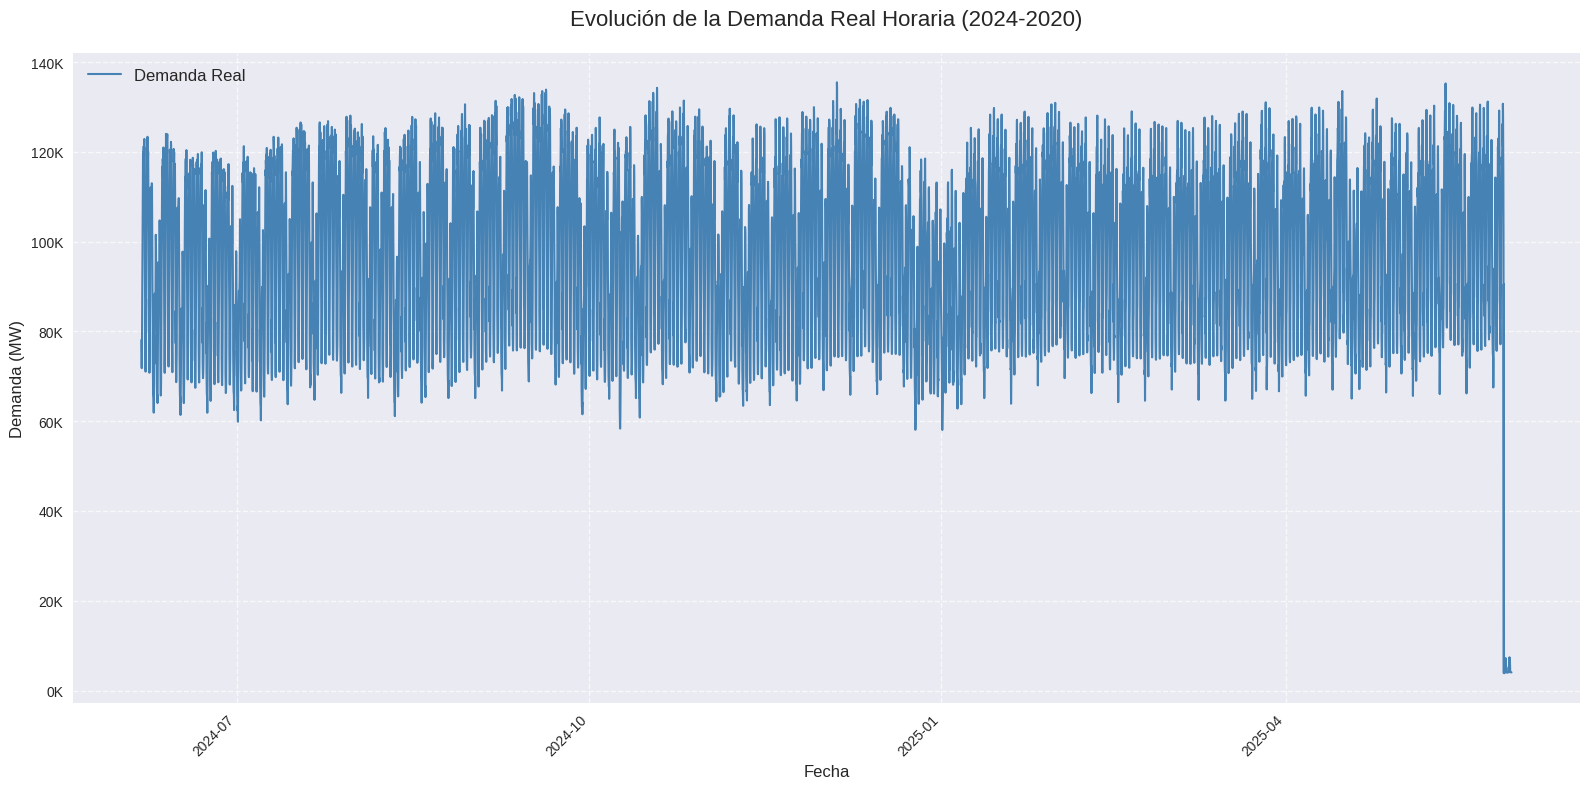

In [40]:
# Configurar el estilo
plt.style.use('seaborn-v0_8')

# Crear figura más grande
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar los datos
ax.plot(df_demanda['datetime'], df_demanda['demanda_real'], 
        color='steelblue', linewidth=1.5, label='Demanda Real')

# Formatear el eje X para fechas
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Cada 3 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato año-mes
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados

# Formatear el eje Y para mejor legibilidad
def millones(x, pos):
    return f'{x/1000:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(millones))

# Añadir título y etiquetas
ax.set_title('Evolución de la Demanda Real Horaria (2024-2020)', fontsize=16, pad=20)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Demanda (MW)', fontsize=12)

# Añadir grid y leyenda
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfica
plt.show()

Generación

In [35]:
df_generacion_solar = df_generacion[df_generacion['Tipo_Recurso'] == 'SOLAR']
df_generacion_cogenerador = df_generacion[df_generacion['Tipo_Recurso'] == 'COGENERADOR']
df_generacion_hidraulica = df_generacion[df_generacion['Tipo_Recurso'] == 'HIDRAULICA']

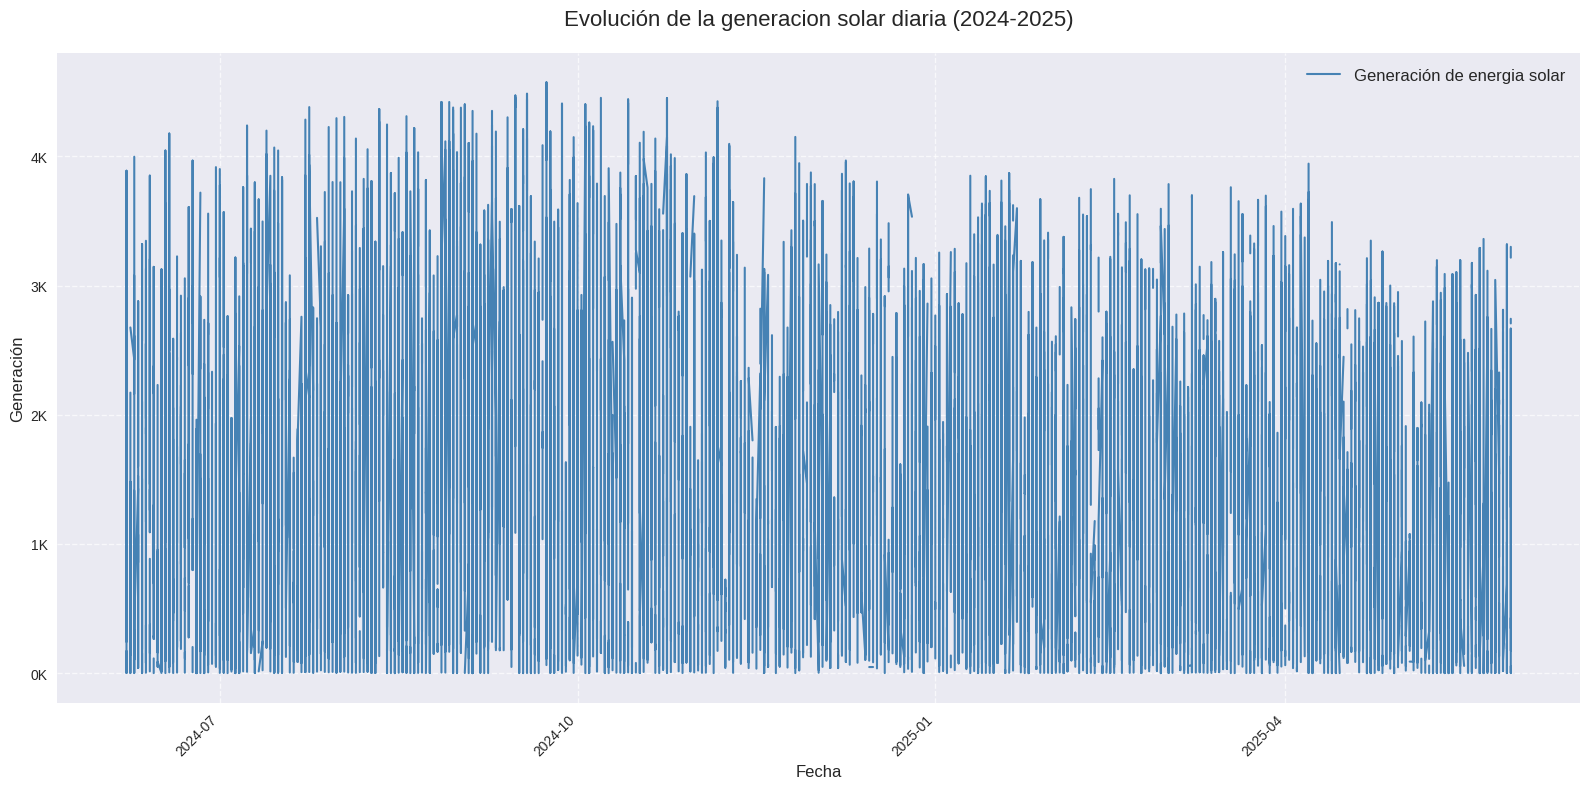

In [41]:
# Configurar el estilo
plt.style.use('seaborn-v0_8')

# Crear figura más grande
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar los datos
ax.plot(df_generacion_solar['Date'], df_generacion_solar['generacion'], 
        color='steelblue', linewidth=1.5, label='Generación de energia solar')

# Formatear el eje X para fechas
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Cada 3 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato año-mes
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados

# Formatear el eje Y para mejor legibilidad
def millones(x, pos):
    return f'{x/1000:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(millones))

# Añadir título y etiquetas
ax.set_title('Evolución de la generacion solar diaria (2024-2025)', fontsize=16, pad=20)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Generación', fontsize=12)

# Añadir grid y leyenda
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfica
plt.show()

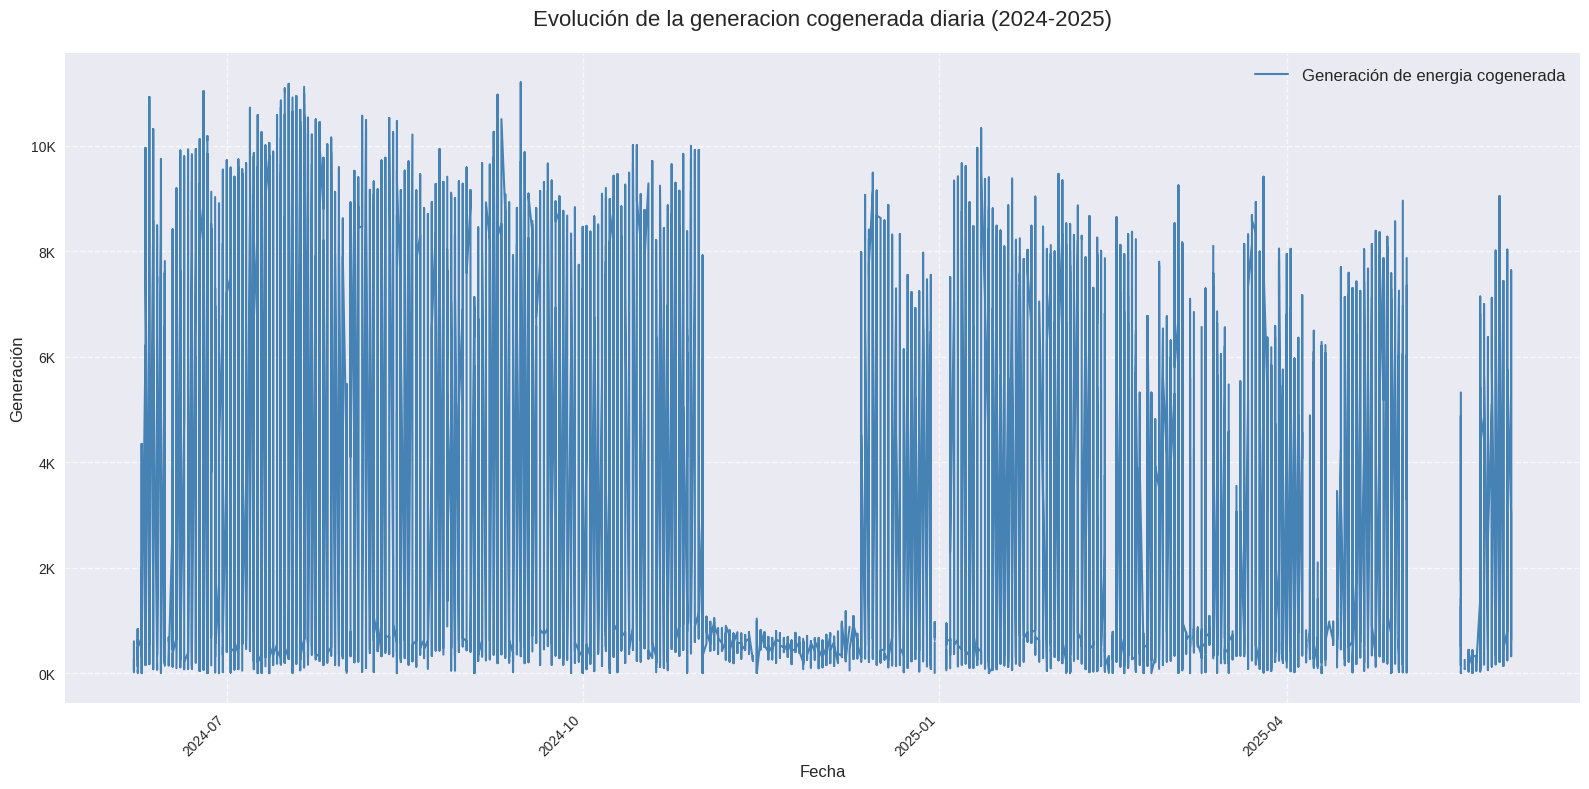

In [42]:
# Configurar el estilo
plt.style.use('seaborn-v0_8')

# Crear figura más grande
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar los datos
ax.plot(df_generacion_cogenerador['Date'], df_generacion_cogenerador['generacion'], 
        color='steelblue', linewidth=1.5, label='Generación de energia cogenerada')

# Formatear el eje X para fechas
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Cada 3 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato año-mes
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados

# Formatear el eje Y para mejor legibilidad
def millones(x, pos):
    return f'{x/1000:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(millones))

# Añadir título y etiquetas
ax.set_title('Evolución de la generacion cogenerada diaria (2024-2025)', fontsize=16, pad=20)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Generación', fontsize=12)

# Añadir grid y leyenda
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfica
plt.show()

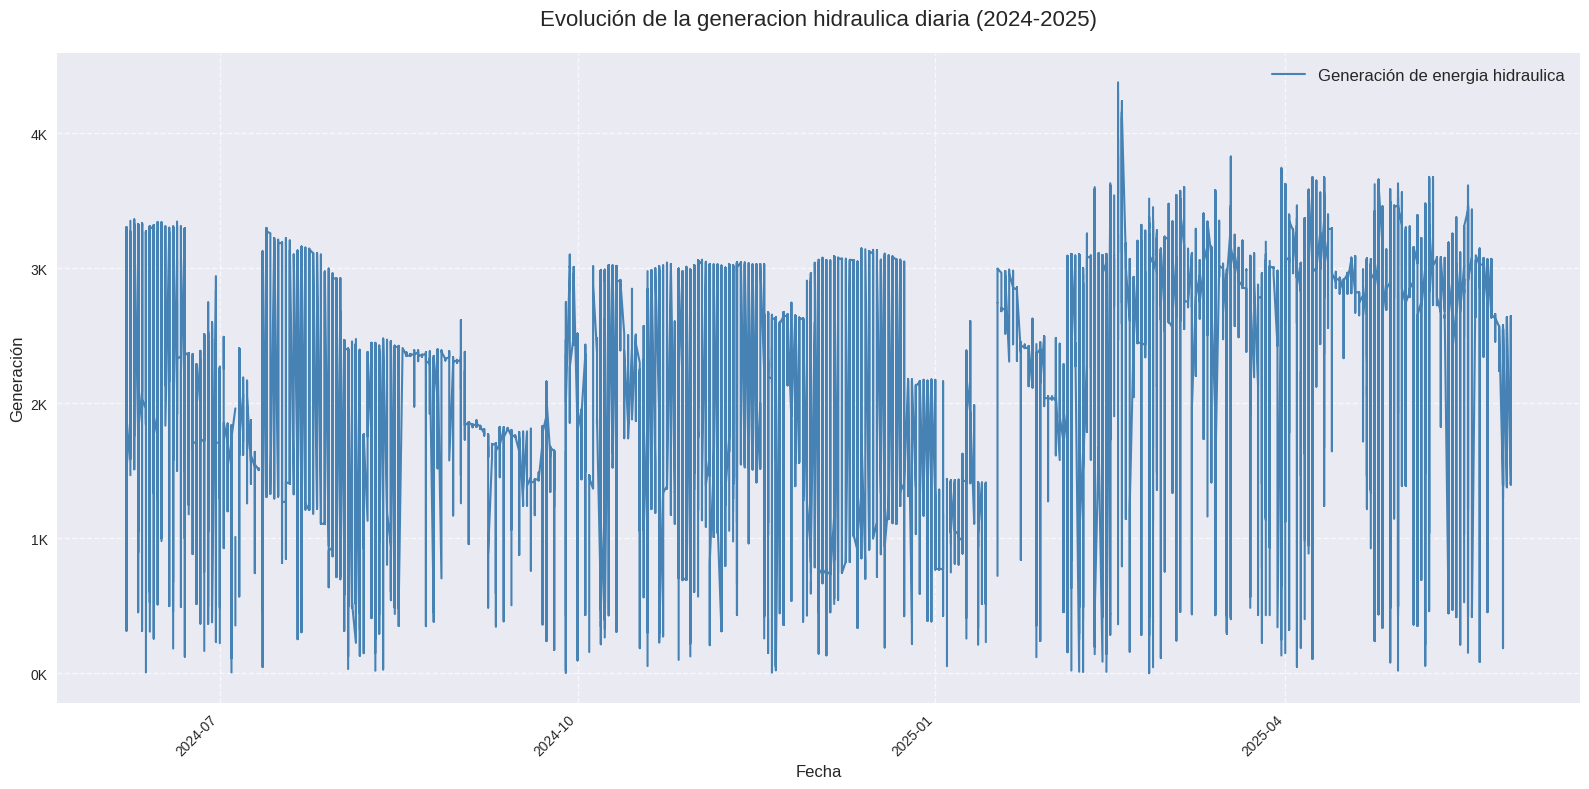

In [43]:
# Configurar el estilo
plt.style.use('seaborn-v0_8')

# Crear figura más grande
fig, ax = plt.subplots(figsize=(16, 8))

# Graficar los datos
ax.plot(df_generacion_hidraulica['Date'], df_generacion_hidraulica['generacion'], 
        color='steelblue', linewidth=1.5, label='Generación de energia hidraulica')

# Formatear el eje X para fechas
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Cada 3 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato año-mes
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados

# Formatear el eje Y para mejor legibilidad
def millones(x, pos):
    return f'{x/1000:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(millones))

# Añadir título y etiquetas
ax.set_title('Evolución de la generacion hidraulica diaria (2024-2025)', fontsize=16, pad=20)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Generación', fontsize=12)

# Añadir grid y leyenda
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfica
plt.show()